# INCEPTION_RESNET PRETRAINED MODEL

#Imports

In [1]:
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.datasets import cifar10

In [2]:
from IPython.core.display import display

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# Constants

In [4]:
file_1 = "01 Umbrella.jpg"
file_2 = "02 Couple.jpg"
file_3 = "03 Ocean.jpg"
file_4 = "04 Horse.jpg"
file_5 = "05 City.jpg"
file_6 = "06 Feet.jpg"
file_7 = "07 Stairs.jpg"
file_8 = "08 Doorway.jpg"
file_9 = "09 Ice Cream.jpg"
file_10 = "10 Red Shoes.jpg"
file_11 = "11 Shoe.jpg"

# Preprocessing Images

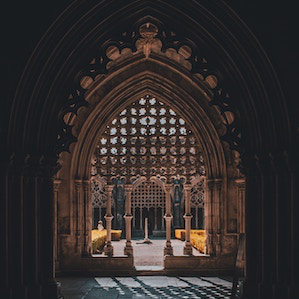

In [6]:
pic = load_img(file_8)
display(pic)

In [32]:
type(pic)

PIL.JpegImagePlugin.JpegImageFile

### Changing the input dimension because inception only accepts 299 * 299 dimensions.

In [7]:
pic = load_img(file_8, target_size=(299, 299))

In [8]:
pic_array = img_to_array(pic)
pic_array.shape

(299, 299, 3)

In [9]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [10]:
expanded

array([[[[24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.],
         ...,
         [24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.]],

        [[24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.],
         ...,
         [24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.]],

        [[24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.],
         ...,
         [24., 28., 31.],
         [24., 28., 31.],
         [24., 28., 31.]],

        ...,

        [[24., 28., 29.],
         [24., 28., 29.],
         [24., 28., 31.],
         ...,
         [25., 29., 32.],
         [27., 28., 32.],
         [27., 28., 32.]],

        [[24., 28., 29.],
         [24., 28., 29.],
         [24., 28., 31.],
         ...,
         [25., 29., 32.],
         [27., 28., 32.],
         [27., 28., 32.]],

        [[24., 28., 29.],
         [24., 28., 29.],
         [24., 28., 31.],
         ...,
         [24., 27., 32.],
        

In [11]:
preprocessed = tf.keras.applications.inception_resnet_v2.preprocess_input(expanded)
## we used this module to change the input format for Inception specifically.

# Load Inception-Resnet

In [12]:
inception_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet')

225209952/225209952 [==============================] - 8s 0us/step


# Making Predictions

In [13]:
prediction = inception_model.predict(preprocessed)
tf.keras.applications.inception_resnet_v2.decode_predictions(prediction)

35363/35363 [==============================] - 0s 0us/step


[[('n02699494', 'altar', 0.53255004),
  ('n03028079', 'church', 0.14719602),
  ('n04523525', 'vault', 0.1089219),
  ('n03781244', 'monastery', 0.061171684),
  ('n04429376', 'throne', 0.0064773113)]]

In [17]:
def format_img_inceptionresnet(filename_in_str):
  pic = load_img(filename_in_str, target_size=(299, 299))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  preprocessed = tf.keras.applications.inception_resnet_v2.preprocess_input(expanded)
  return preprocessed


In [18]:
pred = inception_model.predict(format_img_inceptionresnet(file_4))
tf.keras.applications.inception_resnet_v2.decode_predictions(pred)

1/1 [==============================] - 0s 41ms/step


[[('n02389026', 'sorrel', 0.4483167),
  ('n02412080', 'ram', 0.029898997),
  ('n02106030', 'collie', 0.019694561),
  ('n04604644', 'worm_fence', 0.016888198),
  ('n04049303', 'rain_barrel', 0.013531418)]]

# Making predictions with CIFAR-10 dataset

In [14]:
x_train_img = array_to_img(x_train[4])

In [15]:
type(x_train_img)

PIL.Image.Image

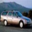

In [16]:
display(x_train_img)

In [17]:
x_train[4].shape

(32, 32, 3)

In [106]:
# new = np.resize(x_train[1], (299,299,3))

In [18]:
from skimage.transform import resize

In [19]:
res = resize(x_train[4], (299,299), preserve_range=True)

In [20]:
type(res)

numpy.ndarray

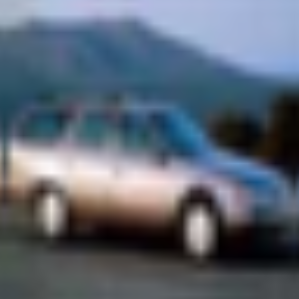

In [21]:
display(array_to_img(res))

In [22]:
res

array([[[169.4101576 , 180.74962249, 198.1037824 ],
        [169.33749622, 180.67696111, 198.07890572],
        [169.26483485, 180.60429973, 198.05402904],
        ...,
        [155.99675898, 175.99675898, 211.12541806],
        [156.1515671 , 176.1515671 , 211.33946488],
        [156.30637521, 176.30637521, 211.55351171]],

       [[169.33749622, 180.35589087, 197.86485889],
        [169.33355891, 180.35195356, 197.89725227],
        [169.32962159, 180.34801624, 197.92964564],
        ...,
        [156.29295254, 176.29295254, 211.44648829],
        [156.43630664, 176.43630664, 211.66053512],
        [156.57966074, 176.57966074, 211.87458194]],

       [[169.26483485, 179.96215926, 197.62593539],
        [169.32962159, 180.02694601, 197.71559882],
        [169.39440834, 180.09173275, 197.80526225],
        ...,
        [156.58914609, 176.58914609, 211.76755853],
        [156.72104619, 176.72104619, 211.98160535],
        [156.85294628, 176.85294628, 212.19565217]],

       ...,

      

In [23]:
expanded = np.expand_dims(res, axis=0)

In [24]:
expanded.shape

(1, 299, 299, 3)

In [25]:
expanded

array([[[[169.4101576 , 180.74962249, 198.1037824 ],
         [169.33749622, 180.67696111, 198.07890572],
         [169.26483485, 180.60429973, 198.05402904],
         ...,
         [155.99675898, 175.99675898, 211.12541806],
         [156.1515671 , 176.1515671 , 211.33946488],
         [156.30637521, 176.30637521, 211.55351171]],

        [[169.33749622, 180.35589087, 197.86485889],
         [169.33355891, 180.35195356, 197.89725227],
         [169.32962159, 180.34801624, 197.92964564],
         ...,
         [156.29295254, 176.29295254, 211.44648829],
         [156.43630664, 176.43630664, 211.66053512],
         [156.57966074, 176.57966074, 211.87458194]],

        [[169.26483485, 179.96215926, 197.62593539],
         [169.32962159, 180.02694601, 197.71559882],
         [169.39440834, 180.09173275, 197.80526225],
         ...,
         [156.58914609, 176.58914609, 211.76755853],
         [156.72104619, 176.72104619, 211.98160535],
         [156.85294628, 176.85294628, 212.19565217]],

In [26]:
preprocessed = tf.keras.applications.inception_resnet_v2.preprocess_input(expanded)

In [27]:
pred = inception_model.predict(preprocessed)

1/1 [==============================] - 0s 41ms/step


In [28]:
tf.keras.applications.inception_resnet_v2.decode_predictions(pred)

[[('n03770679', 'minivan', 0.12786162),
  ('n03796401', 'moving_van', 0.10132906),
  ('n02814533', 'beach_wagon', 0.071404286),
  ('n03670208', 'limousine', 0.046105463),
  ('n03776460', 'mobile_home', 0.031520016)]]

# VGG19 PRETRAINED MODEL

In [19]:
VGG_model = tf.keras.applications.vgg19.VGG19 (weights='imagenet')

574710816/574710816 [==============================] - 17s 0us/step


In [20]:
def format_img_vgg(filename_in_str):
  pic = load_img(filename_in_str, target_size=(224, 224))
  pic_array = img_to_array(pic)
  expanded = np.expand_dims(pic_array, axis=0)
  preprocessed = tf.keras.applications.vgg19.preprocess_input(expanded)
  return preprocessed


In [21]:
prediction = VGG_model.predict(format_img_vgg(file_7))
tf.keras.applications.vgg19.decode_predictions(prediction)

1/1 [==============================] - 1s 876ms/step


[[('n03065424', 'coil', 0.9249145),
  ('n02788148', 'bannister', 0.016366638),
  ('n02795169', 'barrel', 0.013601781),
  ('n04099969', 'rocking_chair', 0.009315847),
  ('n03125729', 'cradle', 0.006469777)]]

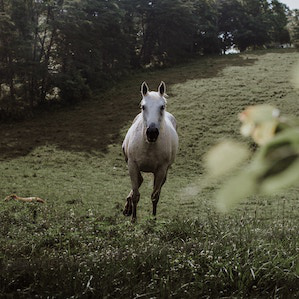

In [22]:
img = load_img(file_4)
display(img)